<a href="https://colab.research.google.com/github/arjun1131/DS-Projects/blob/main/DS_Salaries_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science Salary Prediction

This dataset taken from kaggle. 
Dataset comprises of 607 rows and 11 columns.
The main aim on this project is to predict salary using Linear Regression/XGBRegression

In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor


#Data Collection

In [ ]:
#To read CSV file , I am using read_csv function
ds_data = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')

In [ ]:
ds_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
#Dropping some unwanted features
ds_data.drop(columns = ['salary','salary_currency'],axis = 1, inplace = True)

#Data Analysis

In this part , we will get to know more about dataset

In [ ]:
#To find out basic stats of numerical data in this dataset , we are gonna use describe()
ds_data.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


To know about distributions of features, we are gonna plot distplot for numerical data and countplot for cateogrical data


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


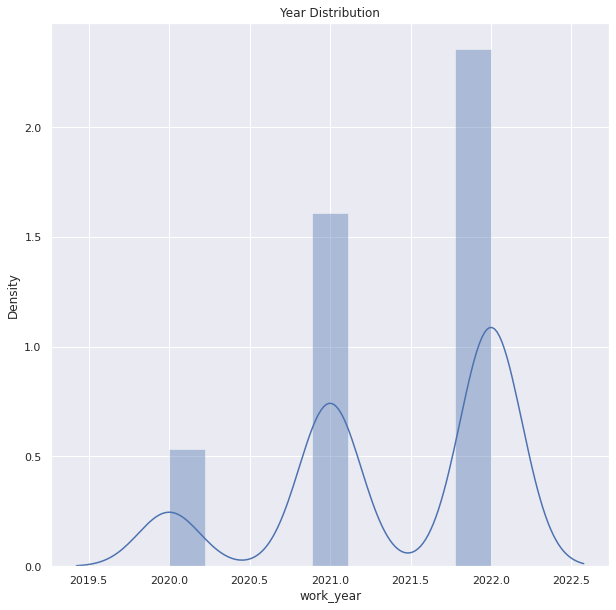

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [ ]:
#Work Year Distribution
sns.set()
plt.figure(figsize = (10,10))
sns.distplot(ds_data['work_year'])
plt.title('Year Distribution')
plt.show()
ds_data['work_year'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


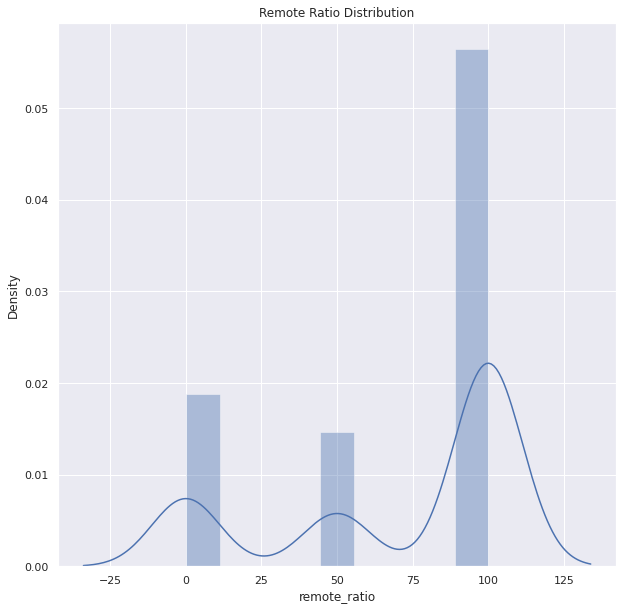

In [ ]:
#Remote Ratio Distribution
plt.figure(figsize = (10,10))
sns.distplot(ds_data['remote_ratio'])
plt.title('Remote Ratio Distribution')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


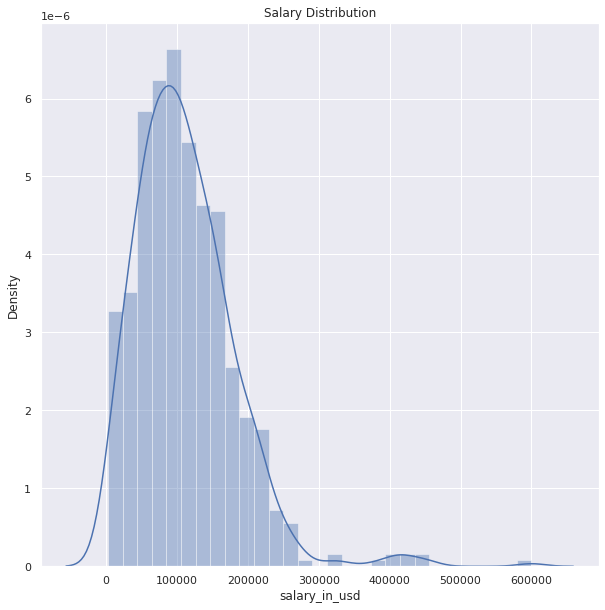

In [ ]:
#Salary Distribution
plt.figure(figsize = (10,10))
sns.distplot(ds_data['salary_in_usd'])
plt.title('Salary Distribution')
plt.show()


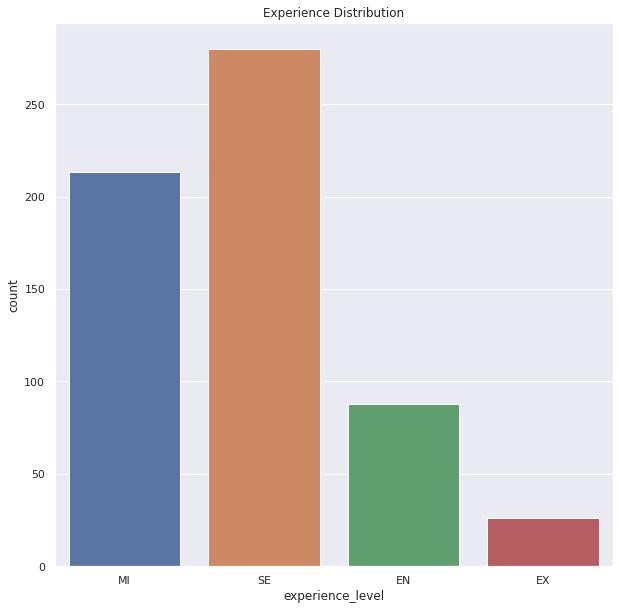

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [ ]:
#Experience Distribution
plt.figure(figsize = (10,10))
sns.countplot( x = 'experience_level', data = ds_data)
plt.title('Experience Distribution')
plt.show()
ds_data['experience_level'].value_counts()

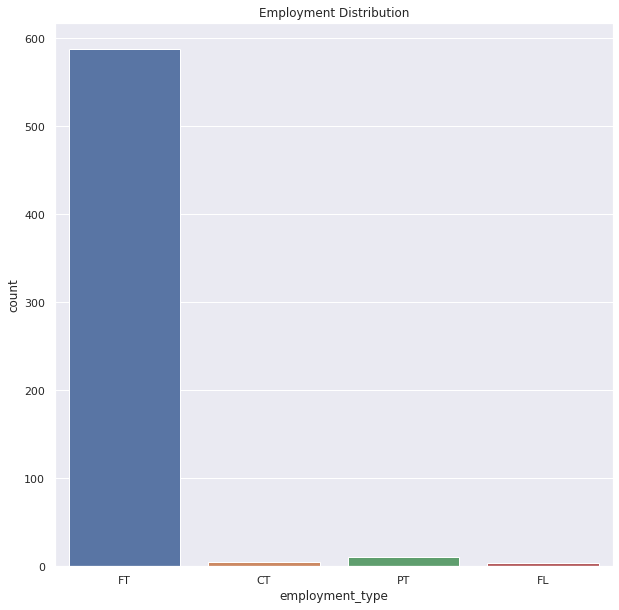

In [ ]:
#Employment Distribution
plt.figure(figsize = (10,10))
sns.countplot( x = 'employment_type', data = ds_data)
plt.title('Employment Distribution')
plt.show()


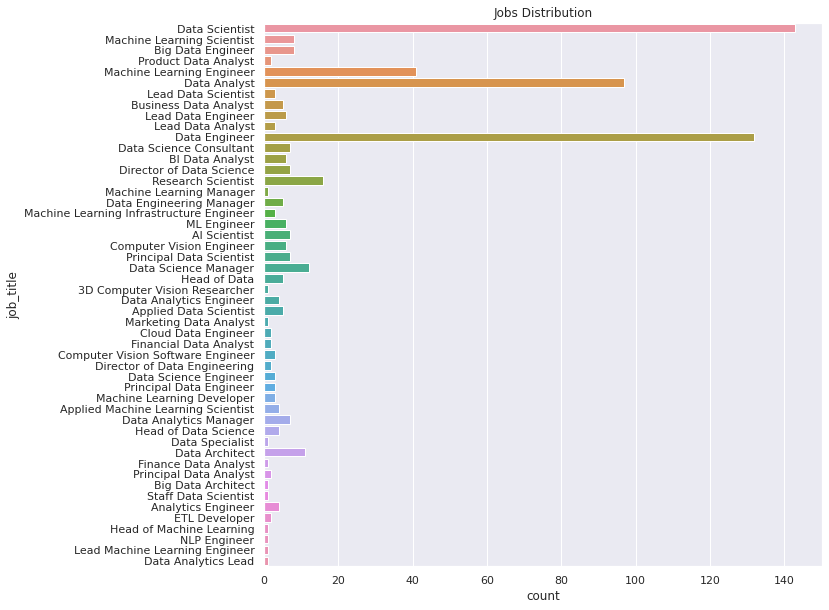

In [ ]:
#Jobs Distribution
plt.figure(figsize = (10,10))
sns.countplot( y = 'job_title', data = ds_data)
plt.title('Jobs Distribution')
plt.show()

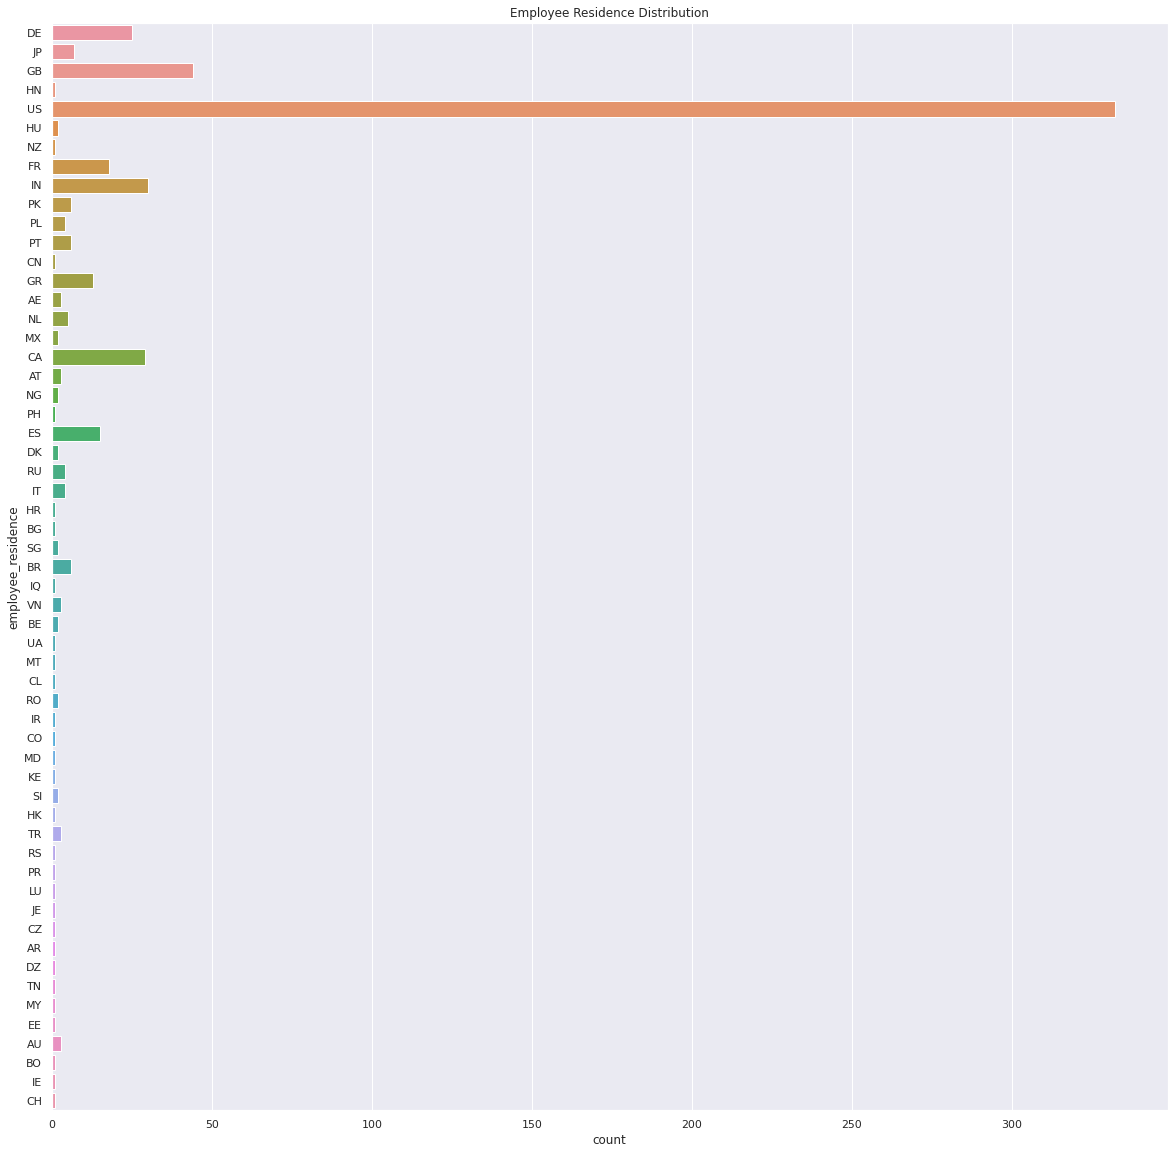

In [ ]:
#Employee Residence Distribution
plt.figure(figsize = (20,20))
sns.countplot( y = 'employee_residence', data = ds_data)
plt.title('Employee Residence Distribution')
plt.show()

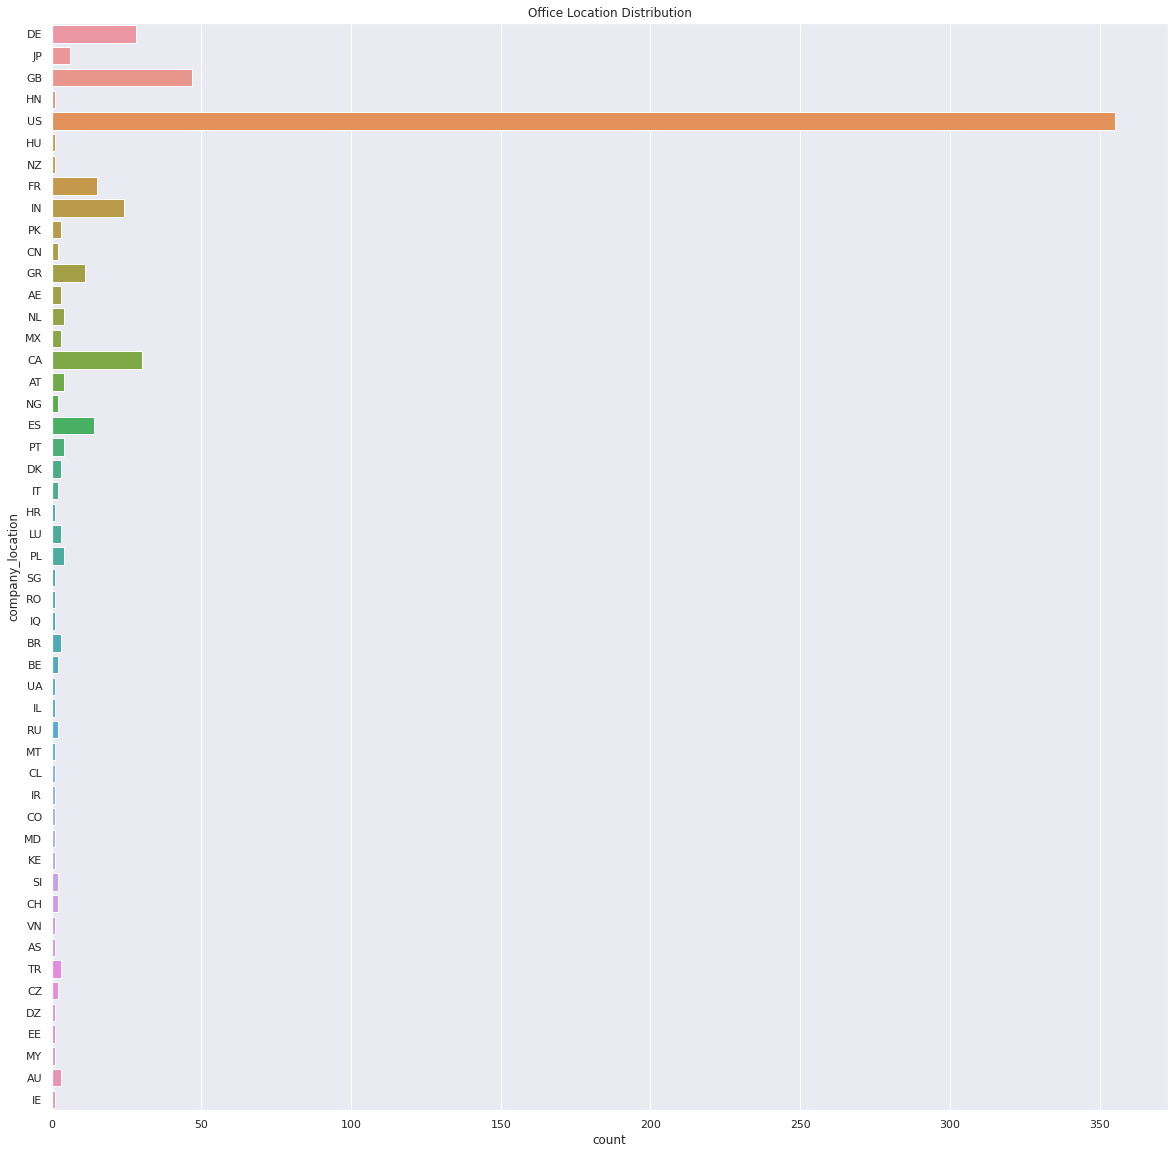

In [ ]:
#company_location
#Office Location Distribution
plt.figure(figsize = (20,20))
sns.countplot( y = 'company_location', data = ds_data)
plt.title('Office Location Distribution')
plt.show()

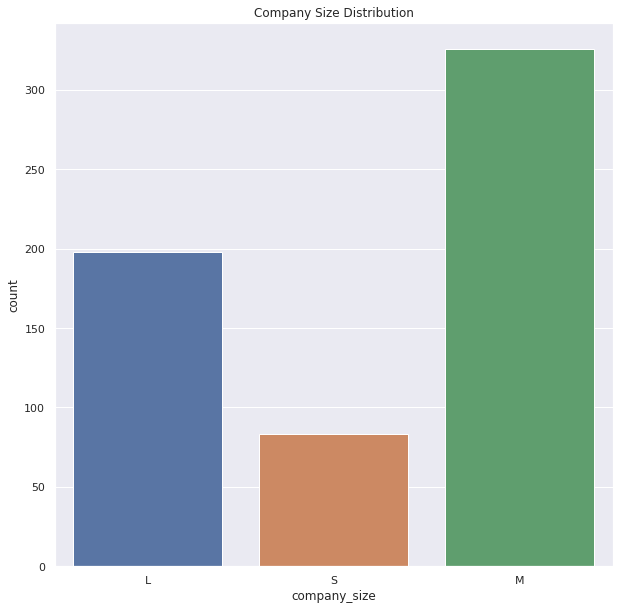

In [ ]:
#Company Size Distribution
plt.figure(figsize = (10,10))
sns.countplot( x = 'company_size', data = ds_data)
plt.title('Company Size Distribution')
plt.show()

#Data Preprocessing 

Encoding catoegrical data into numerical data

In [ ]:
#Replace experience level with numbers
ds_data.replace({'experience_level':{'EN':0,'EX':1,'MI':2,'SE':3}}, inplace = True)

# Replace company size with numbers
ds_data.replace({'company_size':{'S':0,'M':1,'L':2}}, inplace = True)

#Replace employment type with numbers
ds_data.replace({'employment_type':{'CT':0,'FL':1,'FT':2,'PT':3}}, inplace = True)

#Replace job titles with numbers
ds_data.replace({'job_title':{'Data Analytics Lead':49,'Lead Machine Learning Engineer':48,'NLP Engineer':47,'Head of Machine Learning':46,'ETL Developer':45,'Analytics Engineer':44,'Staff Data Scientist':43,'Big Data Architect':42,'Principal Data Analyst':41,'Finance Data Analyst':40,'Data Architect':39,'Data Specialist':38,'Head of Data Science':37,'Data Analytics Manager':36,'Applied Machine Learning Scientist':35,'Machine Learning Developer':34,'Principal Data Engineer':33,'Data Science Engineer':32,'Director of Data Engineering':31,'Computer Vision Software Engineer':30,'Financial Data Analyst':29,'Cloud Data Engineer':28,'Marketing Data Analyst':27,'Applied Data Scientist':26,'Data Analytics Engineer':25,'3D Computer Vision Researcher':24,'Head of Data':23,'Data Science Manager':22,'Principal Data Scientist':21,'Computer Vision Engineer':20,'AI Scientist':19,'ML Engineer':18,'Machine Learning Infrastructure Engineer':17,'Data Engineering Manager':16,'Machine Learning Manager':15,'Research Scientist':14,'Director of Data Science':13,'BI Data Analyst':12,'Data Science Consultant':11,'Data Engineer':10,'Lead Data Analyst':9,'Lead Data Engineer':8,'Business Data Analyst':7,'Lead Data Scientist':6,'Data Analyst':5,'Machine Learning Engineer':4,'Product Data Analyst':3,'Big Data Engineer':2,'Data Scientist':0,'Machine Learning Scientist':1}}, inplace = True)

#Replace employee residence with numbers
ds_data.replace({'employee_residence':{'CH':56,'IE':55,'BO':54,'AU':53,'EE':52,'MY':51,'TN':50,'DZ':49,'AR':48,'CZ':47,'JE':46,'LU':45,'PR':44,'RS':43,'TR':42,'HK':41,'SI':40,'KE':39,'MD':38,'CO':37,'IR':36,'RO':35,'CL':34,'MT':33,'UA':32,'BE':31,'VN':30,'IQ':29,'BR':28,'SG':27,'BG':26,'HR':25,'IT':24,'RU':23,'DK':22,'ES':21,'PH':20,'NG':19,'AT':18,'CA':17,'MX':16,'NL':15,'AE':14,'GR':13,'CN':12,'PT':11,'PL':10,'PK':9,'IN':8,'FR':7,'NZ':6,'HU':5,'US':4,'HN':3,'GB':2,'DE':0,'JP':1}}, inplace = True)

#Replace company location with others
ds_data.replace({'company_location':{'IE':49,'AU':48,'MY':47,'EE':46,'DZ':45,'CZ':44,'TR':43,'AS':42,'VN':41,'CH':40,'SI':39,'KE':38,'MD':37,'CO':36,'IR':35,'CL':34,'MT':33,'RU':32,'IL':31,'UA':30,'BE':29,'BR':28,'IQ':27,'RO':26,'SG':25,'PL':24,'LU':23,'HR':22,'IT':21,'DK':20,'PT':19,'ES':18,'NG':17,'AT':16,'CA':15,'MX':14,'NL':13,'AE':12,'GR':11,'CN':10,'PK':9,'IN':8,'FR':7,'NZ':6,'HU':5,'US':4,'HN':3,'GB':2,'DE':0,'JP':1}}, inplace = True)


#Splitting features and target

In [ ]:
x = ds_data.drop(columns = 'salary_in_usd', axis =1)
y = ds_data['salary_in_usd']

#Splitting train & test data

In [ ]:
#Spliting data by using train_test_split function
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape, x_test.shape , y_train.shape , y_test.shape)

(485, 8) (122, 8) (485,) (122,)


#Model Training

Linear Regression

In [ ]:
#Loading model into variable
reg = LinearRegression()

In [ ]:
#Training model with X_train , Y_train
reg.fit(x_train,y_train)

LinearRegression()

#Model Evaluation

In [ ]:
#Predicting on training data
train_data_prediction = reg.predict(x_train)

In [ ]:
#R^2 value evaluation on training data
r2_train = metrics.r2_score(y_train , train_data_prediction)
print(r2_train)

0.23963964069953836


In [ ]:
#Predicting on test data
test_data_prediction = reg.predict(x_test)

In [ ]:
#R^2 value evaluation on testing data
r2_test = metrics.r2_score(y_test , test_data_prediction)
print(r2_test)

0.26163117256030055


#Model Training

XGB Regressor

In [ ]:
#Creating instance of model
xg = XGBRegressor()

In [ ]:
xg.fit(x_train,y_train)

[12:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xgtrainprediction = xg.predict(x_train)

In [ ]:
xg_r2_score = metrics.r2_score(y_train , xgtrainprediction)
print(xg_r2_score)

0.7090636229968045


In [ ]:
xgtestprediction = xg.predict(x_test)
xgtestprediction

array([ 78178.44 , 140583.39 , 133954.53 ,  44253.09 ,  37596.496,
        65235.902, 187256.94 , 133332.16 ,  53996.18 , 111206.85 ,
       161944.9  , 161944.9  ,  86374.07 ,  37764.32 , 111206.85 ,
       118551.445,  31541.92 ,  37179.926, 116800.05 ,  98693.19 ,
        55930.15 , 145449.86 , 118551.445,  65462.81 ,   4413.978,
       187256.94 ,  59622.832,  80376.99 , 204922.11 , 152492.58 ,
        35453.32 ,  29844.285,  43025.344, 106162.53 , 189881.05 ,
       161944.9  , 196754.3  ,  43681.824, 111179.84 , 234762.42 ,
       117109.7  ,  51121.742, 142565.94 ,  46497.44 , 123033.49 ,
       191789.4  , 124910.53 , 140583.39 , 132472.9  ,  41565.938,
       190174.94 , 140583.39 ,  23303.416, 127100.24 ,  78970.07 ,
       140583.39 , 139738.77 , 140583.39 , 140016.58 ,  80376.99 ,
       155190.22 , 122705.26 , 140583.39 ,  61339.168,  21665.703,
       145449.86 ,  35898.855, -20165.746, 115251.83 ,  65332.723,
        77956.44 , 118551.445, 167062.77 , 191977.84 ,  62693.

In [ ]:
xg_r2_score_test = metrics.r2_score(y_test , xgtestprediction)
print(xg_r2_score_test)

0.38544564174988627
